In [1]:
import pandas as pd
import numpy as np
import os
# Plotting libraries
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd "/content/drive/My Drive/Colab Notebooks/Machine Learning/Regresión Lineal Simple y MULTIPLE/"
%ls

/content/drive/My Drive/Colab Notebooks/Machine Learning/Regresión Lineal Simple y MULTIPLE
IRIS.csv  iris.ipynb  iris_RLS_ML.ipynb


In [4]:
# Data file path
data_iris = pd.read_csv("IRIS.csv", header=0)

In [9]:
data_iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
num_filas, num_columnas = data_iris.shape
print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 150
Número de columnas: 5


In [10]:
# summarize the data
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Revisamos la distribucion de las caracteristicas del dataframe

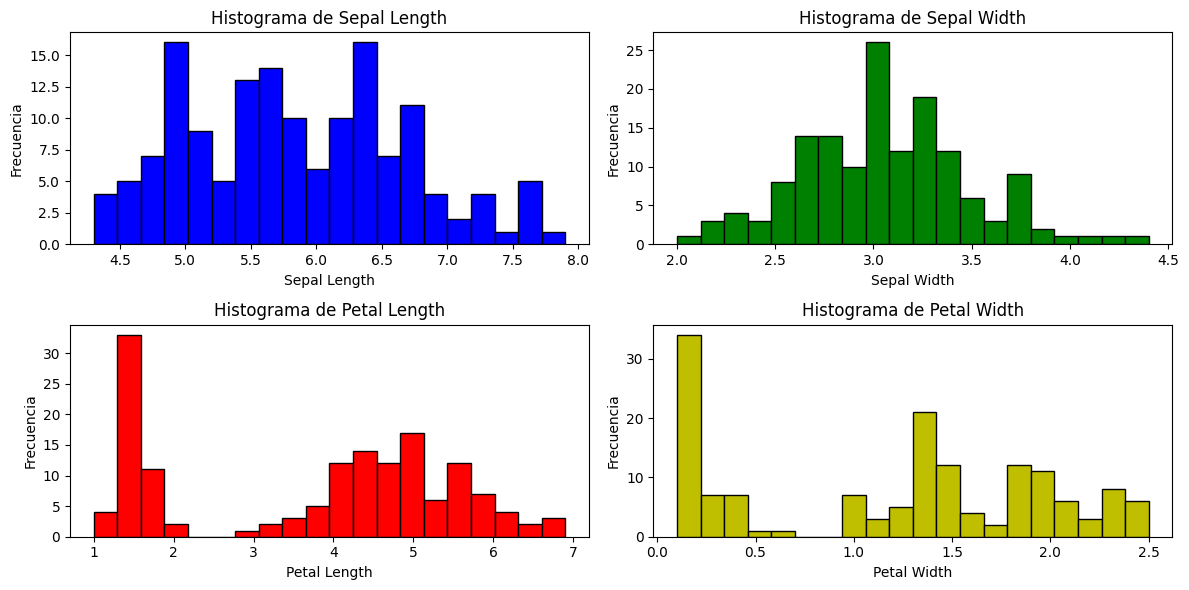

In [16]:
# Histogramas
plt.figure(figsize=(12, 6))

# Histograma de sepal_length
plt.subplot(2, 2, 1)
plt.hist(data_iris['sepal_length'], bins=20, color='b', edgecolor='black')
plt.title('Histograma de Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frecuencia')

# Histograma de sepal_width
plt.subplot(2, 2, 2)
plt.hist(data_iris['sepal_width'], bins=20, color='g', edgecolor='black')
plt.title('Histograma de Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frecuencia')

# Histograma de petal_length
plt.subplot(2, 2, 3)
plt.hist(data_iris['petal_length'], bins=20, color='r', edgecolor='black')
plt.title('Histograma de Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frecuencia')

# Histograma de petal_width
plt.subplot(2, 2, 4)
plt.hist(data_iris['petal_width'], bins=20, color='y', edgecolor='black')
plt.title('Histograma de Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frecuencia')

plt.tight_layout()

## Ahora, grafiquemos cada una de estas características frente a la "sepal_length" para ver cuán lineal es su relación:

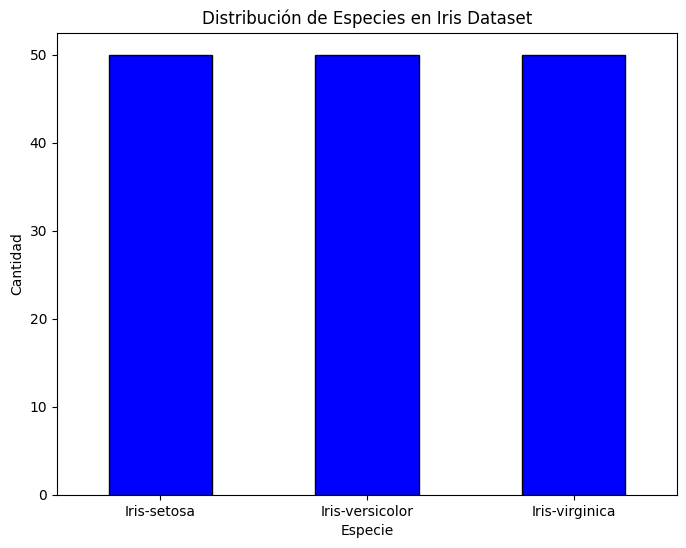

In [ ]:
# Crear un gráfico de barras de la columna categórica "species"
plt.figure(figsize=(8, 6))
data_iris['species'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribución de Especies en Iris Dataset')
plt.xlabel('Especie');plt.ylabel('Cantidad');plt.xticks(rotation=0)  # Rotar etiquetas en el eje x si es necesario
plt.show()

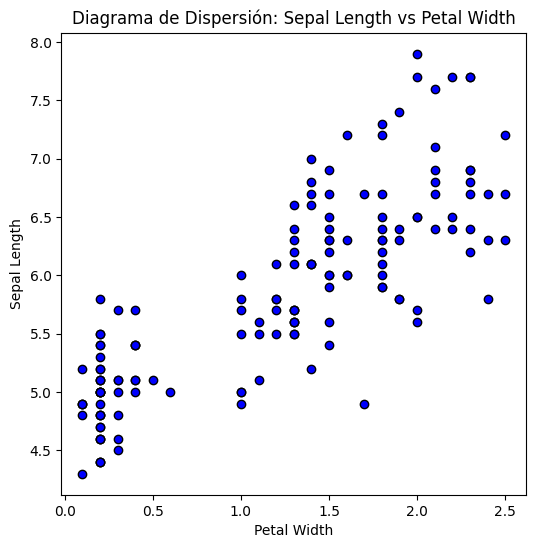

In [ ]:
# Diagrama de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(data_iris['petal_width'], data_iris['sepal_length'], c='b', marker='o', edgecolors='k')
plt.title('Diagrama de Dispersión: Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')

plt.show()

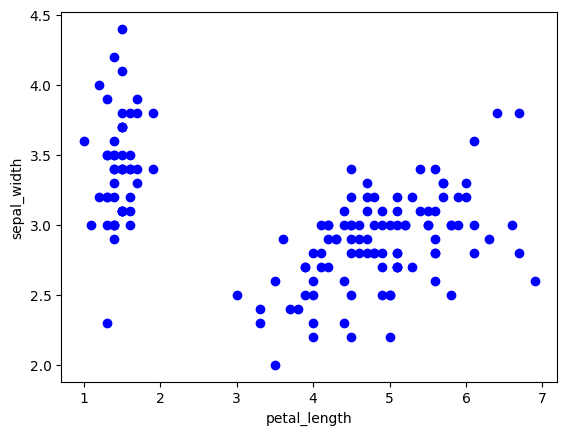

In [19]:
plt.scatter(data_iris.petal_length,data_iris.sepal_width,  color='blue')
plt.ylabel("sepal_width")
plt.xlabel("petal_length")
plt.show()

**El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris Setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: el largo (length) y el ancho(width) de los sépalos(sepal) y pétalos(petal), en centímetros.**

### Creación de conjuntos de datos de entrenamiento y prueba
La división de entrenamiento/prueba implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba que son mutuamente excluyentes. Después de lo cual, entrenas con el conjunto de entrenamiento y pruebas con el conjunto de prueba. Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se utilizó para entrenar el modelo. Por lo tanto, nos brinda una mejor comprensión de qué tan bien se generaliza nuestro modelo con datos nuevos.

Esto significa que conocemos el resultado de cada punto de datos en el conjunto de datos de prueba, ¡lo que lo hace excelente para realizar pruebas! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Entonces, en esencia, se trata verdaderamente de una prueba fuera de muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. El 80% de todo el conjunto de datos se utilizará para entrenamiento y el 20% para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función np.random.rand():

In [21]:
msk = np.random.rand(len(data_iris)) < 0.8
train = data_iris[msk]
test = data_iris[~msk]

In [25]:
msk

array([False,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
       False,  True,

In [26]:
train.head();
train.shape

(120, 5)

In [27]:
test.head(3);
test.shape

(30, 5)

## Modelo de regresión simple.

 La regresión lineal se ajusta a un modelo lineal con coeficientes $\beta = (\beta_1, ..., \beta_n)$ para minimizar la "suma residual de cuadrados" entre el valor real y en el conjunto de datos y el valor predicho yhat mediante una aproximación lineal.

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = train[['petal_length']]
train_y = train[['sepal_width']]
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.10385636]]
Intercept:  [3.43176854]


Text(0, 0.5, 'Emission')

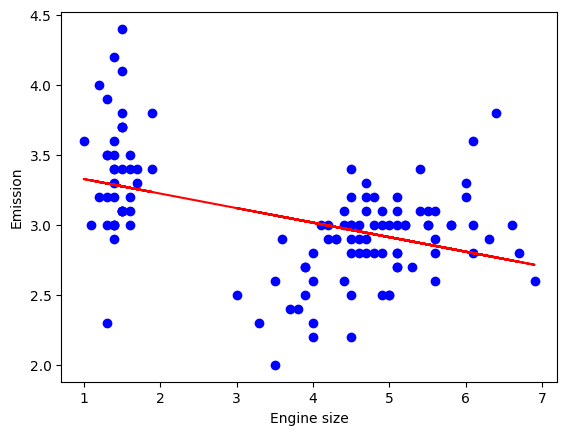

In [29]:
plt.scatter(train.petal_length, train.sepal_width,  color='blue')
#utilizamos los coeficientes hallados anteriormente
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("petal_length")
plt.ylabel("sepal_width")

Evaluación

Comparamos los valores reales y los valores predichos para calcular la precisión de un modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre áreas que requieren mejora.

Existen diferentes métricas de evaluación de modelos, usemos MSE aquí para calcular la precisión de nuestro modelo en función del conjunto de pruebas:

Error Absoluto Medio: Es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender, ya que es solo un error promedio.

Error cuadrático medio (MSE): El error cuadrático medio (MSE) es la media del error cuadrático. Es más popular que el error absoluto medio porque el enfoque está más orientado hacia errores grandes. Esto se debe a que el término cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.

Error cuadrático medio (RMSE).

R cuadrado no es un error, sino más bien una métrica popular para medir el rendimiento de su modelo de regresión. Representa qué tan cerca están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor de R cuadrado, mejor se ajustará el modelo a sus datos. La mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [31]:
from sklearn.metrics import r2_score

test_x = test[['petal_length']]
test_y = test[['sepal_width']]
test_y_ = regr.predict(test_x)

print("\nMean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("\nResidual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("\nR2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 0.36

Residual sum of squares (MSE): 0.19

R2-score: 0.14


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [32]:
regr = linear_model.LinearRegression()
train_x = train[['petal_width']]
train_y = train[['sepal_width']]
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.2137642]]
Intercept:  [3.29635716]


Text(0, 0.5, 'Emission')

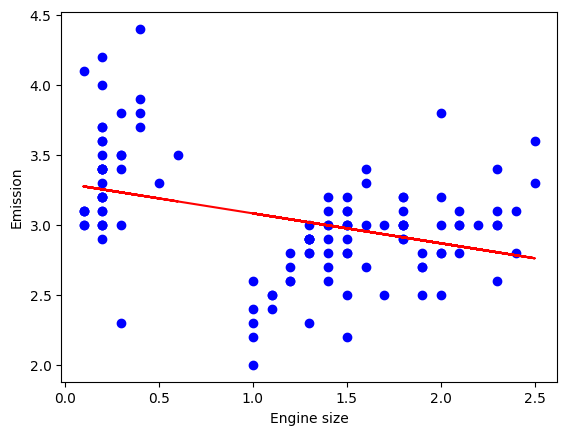

In [33]:
plt.scatter(train.petal_width, train.sepal_width,  color='blue')
#utilizamos los coeficientes hallados anteriormente
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [34]:
test_x = test[['petal_width']]
test_y = test[['sepal_width']]
test_y_ = regr.predict(test_x)

print("\nMean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("\nResidual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("\nR2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 0.38

Residual sum of squares (MSE): 0.20

R2-score: 0.07


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Podemos ver R2 es mucho peor cuando entrenamos usando 'petal_width' que 'petal_lenght'

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


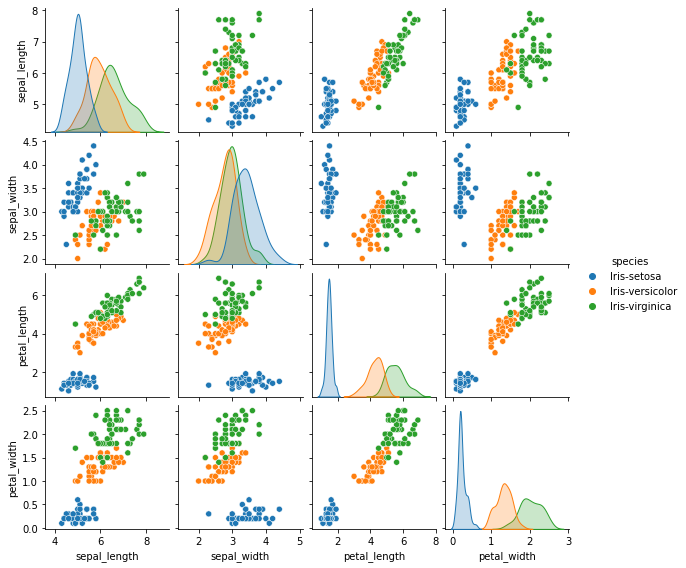

In [ ]:
import seaborn
seaborn.pairplot(data_iris, hue="species", size=2, diag_kind="kde")
plt.show()